# Cross-Validation
In simple terms, Cross-Validation is a technique used to assess how well our Machine learning models perform on unseen data. Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

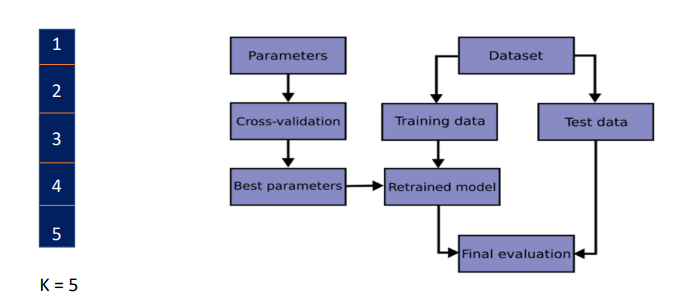

Whenever we build any machine learning model, we feed it with initial data to train the model. And then we feed some unknown data (test data) to understand how well the model performs and generalized over unseen data. If the model performs well on the unseen data, it’s consistent and is able to predict with good accuracy on a wide range of input data; then this model is stable.

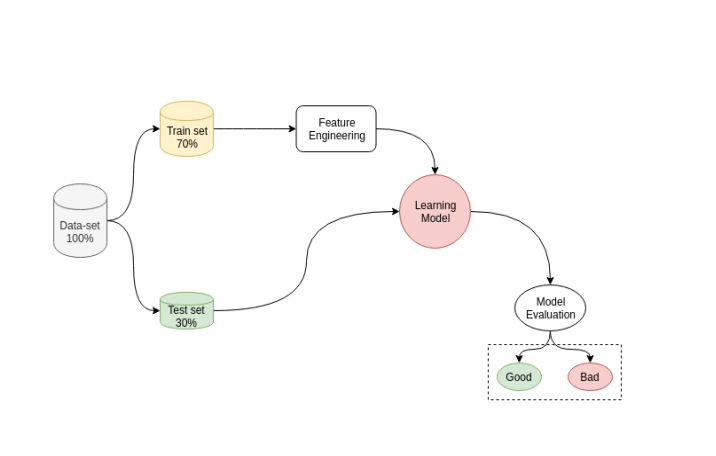

But this is not the case always! Machine learning models are not always stable and we have to evaluate the stability of the machine learning model. That is where Cross Validation comes into the picture.

suppose we build a machine learning model to solve a problem, and we have trained the model on a given dataset. When we check the accuracy of the model on the training data, it is close to 95%. Does this mean that our model has trained very well, and it is the best model because of the high accuracy?

No, it’s not! Because our model is trained on the given data, it knows the data well, captured even the minute variations(noise), and has generalized very well over the given data. If we expose the model to completely new, unseen data, it might not predict with the same accuracy and it might fail to generalize over the new data. This problem is called over-fitting.

Sometimes the model doesn’t train well on the training set as it’s not able to find patterns. In this case, it wouldn’t perform well on the test set as well. This problem is called Under-fitting.

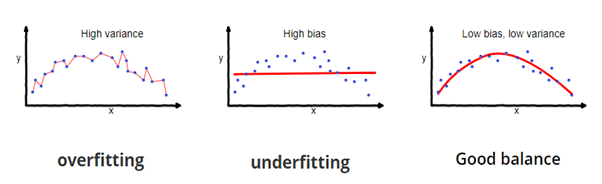

To overcome over-fitting problems, we use a technique called Cross-Validation.

Cross-Validation is a resampling technique with the fundamental idea of splitting the dataset into 2 parts- training data and test data. Train data is used to train the model and the unseen test data is used for prediction. If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.

# Types of Cross Validation

* Hold Out Cross Validation
* K-Fold Cross Validation
* Leave One-Out Cross Validation (LOOCV)
* Stratified K Fold Cross Validation

# Hold Out Cross Validation

This is a quite basic and simple approach in which we divide our entire dataset into two parts training data and testing data. As the name, we train the model on training data and then evaluate on the testing set. Usually, the size of training data is set more than twice that of testing data, so the data is split in the ratio of 70:30 or 80:20.

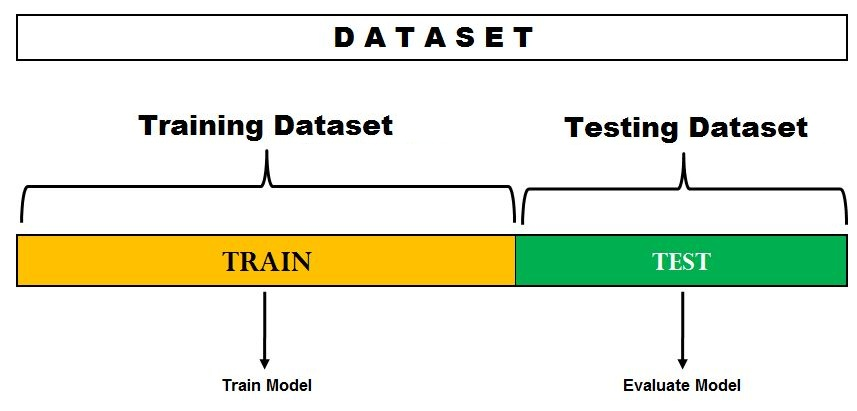

In this approach, the data is first shuffled randomly before splitting. As the model is trained on a different combination of data points, the model can give different results every time we train it, and this can be a cause of instability. Also, we can never assure that the train set we picked is representative of the whole dataset.

Also when our dataset is not too large, there is a high possibility that the testing data may contain some important information that we lose as we do not train the model on the testing set.

The hold-out method is good to use when you have a very large dataset, you’re on a time crunch, or you are starting to build an initial model in your data science project.

# K-Folds Cross Validation
K-fold cross-validation approach divides the input dataset into K groups of samples of equal sizes. These samples are called folds. For each learning set, the prediction function uses k-1 folds, and the rest of the folds are used for the test set. This approach is a very popular CV approach because it is easy to understand, and the output is less biased than other methods.

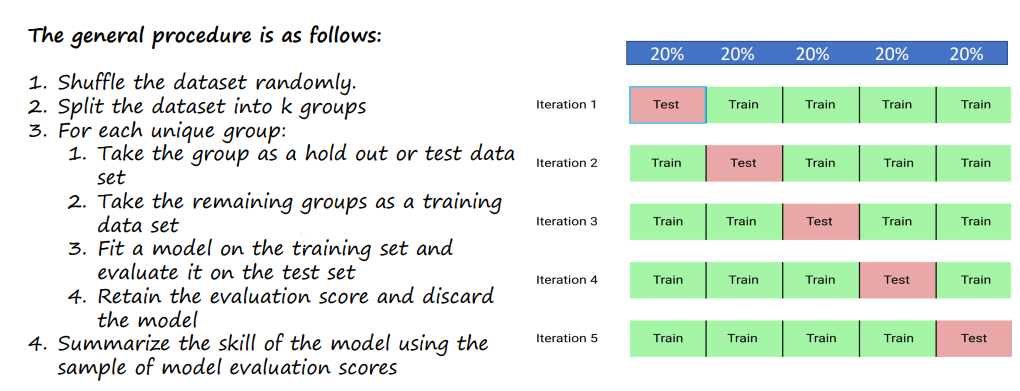

Let’s generalised K value. If K=5, it means, in the given dataset and we are splitting into 5 folds and running the Train and Test. During each run, one fold is considered for testing and the rest will be for training and moving on with iterations, the above representation would give an idea of the flow of the fold-defined size.

In which each data point is used, once in the hold-out set and K-1 in Training. So, during the full iteration at least once, one fold will be used for testing and the rest for training.

In the above set, 5- Testing 20 Training. In each iteration, we will get an accuracy score and have to sum them and find the mean. Here we can understand how the data is spread in a way of consistency and will make a conclusion whether to for the production with this model (or) NOT.

The mean of errors from all the iterations is calculated as the CV test error estimate.

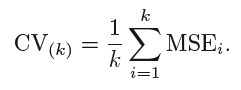

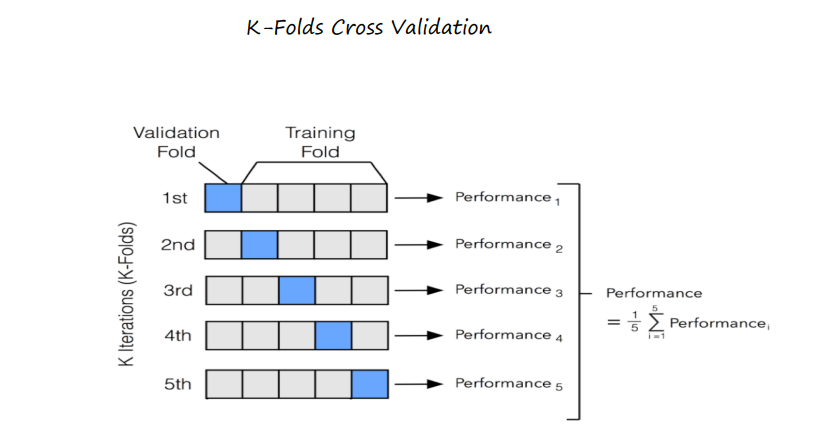

**Typically**, K-fold Cross Validation is performed using k=5 or k=10 as these values have been empirically shown to yield test error estimates that neither have high bias nor high variance.

The major disadvantage of this method is that the model has to be run from scratch k-times and is computationally expensive than the Hold Out method but better than the Leave One Out method.

**Simple implementation of K-Fold Cross-Validation in Python**

In [200]:
from sklearn.model_selection import KFold
X = ["a",'b','c','d','e','f']

kf = KFold(n_splits=3, shuffle=False, random_state=None)

for train, test in kf.split(X):

    print("Train data",train,"Test data",test)

Train data [2 3 4 5] Test data [0 1]
Train data [0 1 4 5] Test data [2 3]
Train data [0 1 2 3] Test data [4 5]


**Thumb Rules Associated with K Fold**
Now, we will discuss a few thumb rules while playing with K – fold

* K should be always >= 2 and = to number of records, (LOOCV)
    * If 2 then just 2 iterations
    * If K=No of records in the dataset, then 1 for testing and n- for training
* The optimized value for the K is 10 and used with the data of good size. (Commonly used)
* If the K value is too large, then this will lead to less variance across the training set and limit the model currency difference across the iterations.
* The number of folds is indirectly proportional to the size of the data set, which means, if the dataset size is too small, the number of folds can increase.
* Larger values of K eventually increase the running time of the cross-validation process.

**K-Fold Cross Validation for the below purpose in the ML stream.**

* Model selection
* Parameter tuning
* Feature selection

# Leave One-Out Cross Validation (LOOCV)

In this method, we divide the data into train and test sets – but with a twist. Instead of dividing the data into 2 subsets, we select a single observation as test data, and everything else is labeled as training data and the model is trained. Now the 2nd observation is selected as test data and the model is trained on the remaining data.

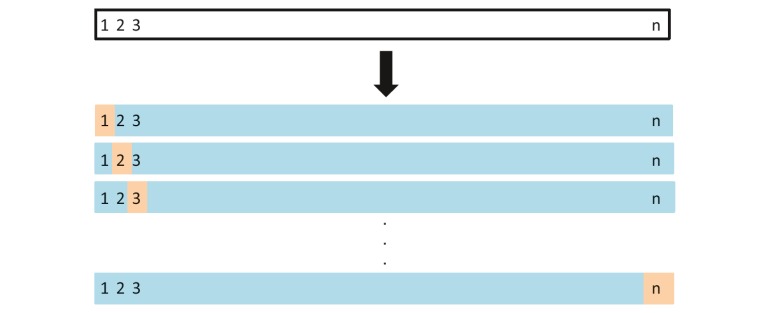

This process continues ‘n’ times and the average of all these iterations is calculated and estimated as the test set error.

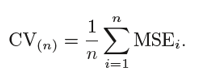

This process repeats for each datapoint. Hence for n samples, we get n different training set and n test set. It has the following features:

* In this approach, the bias is minimum as all the data points are used.

* The process is executed for n times; hence execution time is high.

* This approach leads to high variation in testing the effectiveness of the model as we iteratively check against one data point.

**Quick implementation of Leave One Out Cross-Validation in Python**

In [201]:
from sklearn.model_selection import LeaveOneOut
X = [10,20,30,40,50,60,70,80,90,100]

l = LeaveOneOut()

for train, test in l.split(X):

    print("%s %s"% (train,test))

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


This output clearly shows how LOOCV keeps one observation aside as test data and all the other observations go to train data.

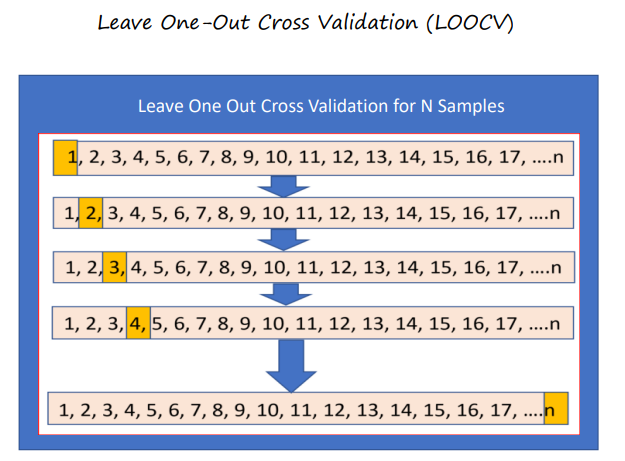

# Stratified K Fold Cross Validation

Using K Fold on a classification problem can be tricky. Since we are randomly shuffling the data and then dividing it into folds, chances are we may get highly imbalanced folds which may cause our training to be biased. For example, let us somehow get a fold that has majority belonging to one class(say positive) and only a few as negative class. This will certainly ruin our training and to avoid this we make stratified folds using stratification.

Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole. For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.

Let’s consider a example which has a cosmetic product review of 1000 customers out of which 60% is female and 40% is male. I want to split the data into train and test data in proportion (80:20). 80% of 1000 customers will be 800 which will be chosen in such a way that there are 480 reviews associated with the female population and 320 representing the male population. In a similar fashion, 20% of 1000 customers will be chosen for the test data ( with the same female and male representation).

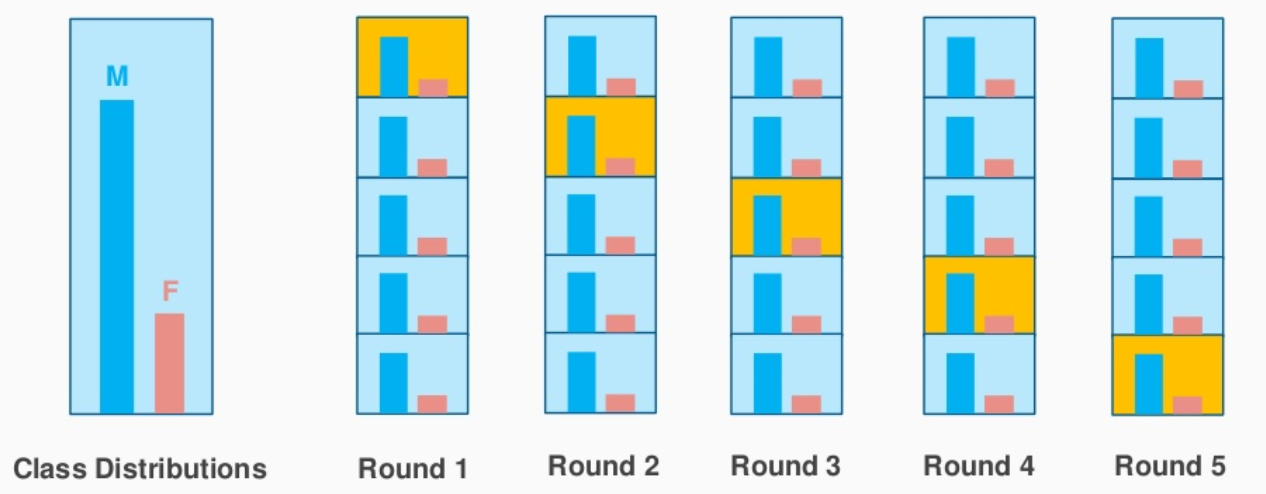

This is exactly what stratified K-Fold CV does and it will create K-Folds by preserving the percentage of sample for each class. This solves the problem of random sampling associated with Hold out and K-Fold methods.

**Quick implementation of Stratified K-Fold Cross-Validation in Python**

In [202]:
from sklearn.model_selection import StratifiedKFold
X=np.array([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12]])
y=np.array([0,0,1,0,1,1])

skf = StratifiedKFold(n_splits=3,random_state=None,shuffle=False)

for train_index, test_index in skf.split(X,y):
    print("Train:",train_index,'Test:',test_index)
    X_train,X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index]
    

Train: [1 3 4 5] Test: [0 2]
Train: [0 2 3 5] Test: [1 4]
Train: [0 1 2 4] Test: [3 5]


The output clearly shows the stratified split done based on the classes ‘0’ and ‘1’ in ‘y’.

# Bias – Variance Tradeoff

When we consider the test error rate estimates, 
* K-Fold Cross Validation gives more accurate estimates than Leave One Out Cross-Validation. 
* Whereas Hold One Out CV method usually leads to overestimates of the test error rate, because in this approach, only a portion of the data is used to train the machine learning model.

* When it comes to bias, the Leave One Out Method gives unbiased estimates because each training set contains n-1 observations (which is pretty much all of the data). 

* K-Fold CV leads to an intermediate level of bias depending on the number of k-folds when compared to LOOCV but it’s much lower when compared to the Hold Out Method.

To conclude, the Cross-Validation technique that we choose highly depends on the use case and bias-variance trade-off.

**Applications of Cross-Validation**
* This technique can be used to compare the performance of different predictive modeling methods.
* It has great scope in the medical research field.
* It can also be used for the meta-analysis, as it is already being used by the data scientists in the field of medical statistics.

# Oversampling and Undersampling

In Machine Learning and Data Science we often come across a term called Imbalanced Data Distribution, generally happens when observations in one of the class are much higher or lower than the other classes.

where the number of majority class is much bigger than the minority class, thus make the model unable to learn from minority class well. This becomes a serious problem when the information in the dataset from the minority class is more important, for example, like disease detection dataset, churn dataset, and fraud detection dataset.

One of the popular approaches to solve this imbalance dataset problem is either to oversample the minority class or undersample the majority class.oversampling method, the idea is to duplicate some random examples from the minority class — thus this technique does not add any new information from the data. The undersampling method is conducted by removing some random examples from the majority class, at cost of some information in the original data are removed as well.

One of the solutions to overcome that weakness is to generate new examples that are synthesized from the existing minority class. This method is well known as Synthetic Minority Oversampling Technique or SMOTE

**Imbalanced Data Handling Techniques**: There are mainly 2 mainly algorithms that are widely used for handling imbalanced class distribution.

* SMOTE
* Near Miss Algorithm

# The Concept: SMOTE

SMOTE is one of the most popular oversampling techniques that is developed by Chawla et al. (2002). Unlike random oversampling that only duplicates some random examples from the minority class, SMOTE generates examples based on the distance of each data (usually using Euclidean distance) and the minority class nearest neighbors, so the generated examples are different from the original minority class.

In short, the process to generate the synthetic samples are as follows.

* Choose random data from the minority class.
* Calculate the Euclidean distance between the random data and its k nearest neighbors.
* Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
* Repeat the procedure until the desired proportion of minority class is met.

This method is effective because the synthetic data that are generated are relatively close with the feature space on the minority class, thus adding new “information” on the data, unlike the original oversampling method.

# The Concept: Tomek Links

Tomek Links is one of a modification from Condensed Nearest Neighbors (CNN, not to be confused with Convolutional Neural Network) undersampling technique that is developed by Tomek (1976). Unlike the CNN method that are only randomly select the samples with its k nearest neighbors from the majority class that wants to be removed, the Tomek Links method uses the rule to selects the pair of observation (say, a and b) that are fulfilled these properties:

The observation a’s nearest neighbor is b.
The observation b’s nearest neighbor is a.
Observation a and b belong to a different class. That is, a and b belong to the minority and majority class (or vice versa), respectively.

This method can be used to find desired samples of data from the majority class that is having the lowest Euclidean distance with the minority class data (i.e. the data from the majority class that is closest with the minority class data, thus make it ambiguous to distinct), and then remove it.

# SMOTE-Tomek Links

**class imblearn.combine.SMOTETomek(*, sampling_strategy='auto', random_state=None, smote=None, tomek=None, n_jobs=None**)

**Over-sampling using SMOTE and cleaning using Tomek links.**

**Combine over- and under-sampling using SMOTE and Tomek links.****

Introduced first by Batista et al. (2003), this method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class (that is, samples of data from the majority class that is closest with the minority class data). The process of SMOTE-Tomek Links is as follows.

* (Start of SMOTE) Choose random data from the minority class.
* Calculate the distance between the random data and its k nearest neighbors.
* Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
* Repeat step number 2–3 until the desired proportion of minority class is met. (End of SMOTE)
* (Start of Tomek Links) Choose random data from the majority class.
* If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.

# NearMiss Algorithm – Undersampling

**class imblearn.under_sampling.NearMiss(*, sampling_strategy='auto', version=1, n_neighbors=3, n_neighbors_ver3=3, n_jobs=None)**

**Class to perform under-sampling based on NearMiss methods**

The Near-miss Algorithm is used to balance an imbalanced dataset and is considered as an algorithm for undersampling and is one of the most powerful ways to balance data.

The Near-Miss algorithm works by observing the class distribution, removing samples located in the higher class. Simply put, if the algorithm witnesses a case in which two near points that pertain to different classes occur, it simply excludes the one from the higher class and ensures that the balance is preserved.

To prevent problem of information loss in most under-sampling techniques, near-neighbor methods are widely used.
The basic intuition about the working of near-neighbor methods is as follows:

* Step 1: The method first finds the distances between all instances of the majority class and the instances of the minority class. Here, majority class is to be under-sampled.
* Step 2: Then, n instances of the majority class that have the smallest distances to those in the minority class are selected.
* Step 3: If there are k instances in the minority class, the nearest method will result in k*n instances of the majority class.

There are 3 main versions of the near-miss algorithm. They are listed as follows:

Type 1: In this type of Near-Miss Algorithm, unbalanced data is improvised by assessing the minimum distance (avg) between the large distribution and three farther small distribution.

Type 2: In this version, the balancing of data occurs by figuring out the distance between ‘n’ neighbors of the data points belonging to smaller classes. The largest distance obtained from this calculation is eliminated.

Type 3: This version involves the calculation of the minimum or shortest base distance between the larger distribution and three other smaller distributions close to it.



**Using the Near-Miss Algorithm for an unbalanced dataset**

To use the Near-Miss Algorithm for an unbalanced dataset, three major steps are followed. As a part of the first step, the distance between the points belonging to the larger class and the point belonging to the smaller class is considered.

This is done to ensure that the undersampling process is simplified. Moving to the second part, the instances belonging to the larger class are selected. While selecting these instances, it should be noted that only those who have the shortest distance are chosen. As a final step, the algorithm returns m*n instances from the larger class.

# Cross-Validation-Techniques-implementation in python

# K-Folds Cross Validation

KFold divides the samples into k groups (folds) of approximately equal sizes. Out of these k groups, k-1 folds are used for training and the remaning one is used for testing. This process is repeated k times

**KFold(n_splits=5, *, shuffle=False, random_state=None)**

n_splits --> number of folds, default=5 shuffle: bool, default=False Shuffle is used to shuffle the data before splitting it into batches. Samples within each split will not be shuffled.

random_state --> int, default=None This is used to control the randomness of each fold and it affects the ordering of indices only when shuffle=True, else it doesn't have any effect

In [203]:
import numpy as np
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [204]:
x = ['a','b','c','d','e','f']
kf=KFold(n_splits=3, shuffle=False, random_state=None)
print(kf)

KFold(n_splits=3, random_state=None, shuffle=False)


In [205]:
for train, test in kf.split(x):
    print('train:',train,'test:',test)

train: [2 3 4 5] test: [0 1]
train: [0 1 4 5] test: [2 3]
train: [0 1 2 3] test: [4 5]


# Stratified K-Fold

This technique is a variation of K-Fold, and it divides the data into k-stratified folds. This way it preserves the percentage of samples of each class present in the data

It generates test sets such that all sets contain the same distribution of classes, or as close as possible

**sklearn.model_selection.StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None)**

In [206]:
from sklearn.model_selection import StratifiedKFold

x=np.array([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12]])
y=np.array([0,0,1,0,1,1])
skf= StratifiedKFold(n_splits=3,random_state=None, shuffle=False)

for train_index, test_index in skf.split(x,y):
    print('train:', train_index,'test:', test_index)
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]

train: [1 3 4 5] test: [0 2]
train: [0 2 3 5] test: [1 4]
train: [0 1 2 4] test: [3 5]


# Leave One Out Cross Validation

Almost all of the data (n-1 of the n samples) is used to build each model, all of the models are identical to each other and this results in high variance compared KFold.

**sklearn.model_selection import LeaveOneOut( )**

In [207]:
from sklearn.model_selection import LeaveOneOut

In [208]:
X = [10,20,30,40,50,60,70,80,90,100]
l = LeaveOneOut()

In [209]:
for train, test in l.split(X):
    print("%s %s"% (train,test))

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]
